# Recap

## Use Google! Use --help!

You know how to navigate: `cd `, `less`, `zcat`, `mv`, `rm` etc.

You know how to run commands on the command line, and how they handle data: `|` `>` - and also, what happens with `.gz` files!

You know basic tools: `grep`, `cut`, `awk` and some special characters and regular expressions:  `*`, `==`, `&&`, `[0-9]` etc.

You know what `.fa` files look like and mean, what `.fastq` files look like and mean.

You can clean them up by doing adapter trimming.


# Now: Mapping of sequencing data

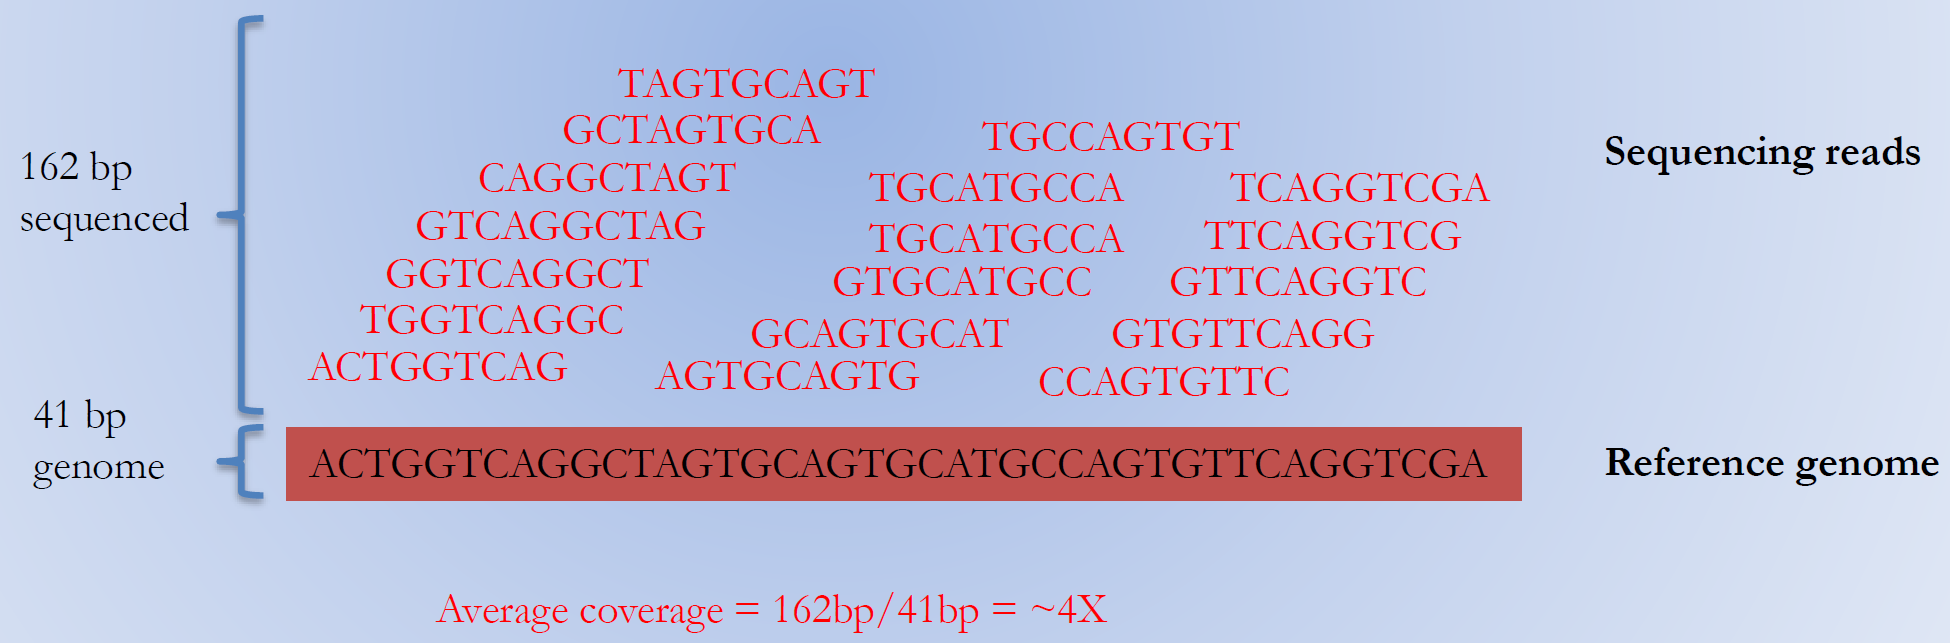

Finding where in the genome a short sequencing fragment belongs.

Doing that for millions of lines is a challenge - algorithmic abbreviations. The most commonly used command line tool is called `bwa`, find [here](https://bio-bwa.sourceforge.net/bwa.shtml) the documentation. 

## **BWA**

This tool has several different algorithms. The most commonly used one is `bwa mem`. Note that here we use that one because it is the easiest, but the sample data is (semi-)ancient, and in practice a different algorithm would be favourable.

You provide a reference genome to align to. Actually, this one has to be *indexed* first, meaning a "guide" to the "map" is created. This "guide" looks the same for a given reference genome, so it just needs to be created once, and you can [download](https://hgdownload.soe.ucsc.edu/goldenPath/hg19/bigZips/analysisSet/) a ready-made index. It is already in the same directory as the reference genome.

Then, you point to the index and map your fastq file:

```
bwa mem -R '@RG\tID:1\tSM:1' /home/local/ANTHROPOLOGY/kuhlwilmm83/refgen/hg19/hg19.p13.plusMT.no_alt_analysis_set.fa test_p.fastq.gz > test.sam
```

Output: **SAM file** - a file that contains the sequence and its coordinates on the 23 chromosomes.

**Note**: Here, we use a SAM file entirely for demonstration purpose. If you ever work on real data, *never* create a SAM file! It is extremely inefficient, and the output of bwa should immediately piped into another tool in order to get a BAM file (compressed).


# SAM/BAM files

Now, we have created a sequencing alignment file:

![image.png](attachment:image.png)

It contains more than just the sequence information:

* Read information
* Position in the genome
* Mapping quality
* Information from FASTQ (Sequence & quality)
* CIGAR (alignment)
* Other stuff

**BAM** or **CRAM**: compressed versions of such files, and much more efficient! However, they are different from zipped (`.gz`) files, but *binary* files instead. That means, they use a different, more basal encoding, and cannot be accessed by with usual text processing tools such as `grep`.

How do we get such a file? More generally, how do we process and access SAM/BAM/CRAM files?

## [**SAMTOOLS**](http://www.htslib.org/doc/samtools.html)

Let's first save some space on the server. 

```
samtools view -b -o test.bam test.sam

ls -lh test.*
```

Now you see the difference in space! Considering the significant increase in information in the file, also compare to the raw (zipped!) sequencing data. Now remove `test.sam`!

And now you see that you cannot access it as text file anymore: `less test.bam` or `zless test.bam` - nope!

So, from here, you have to rely on `samtools` to see what is going on.

```
samtools view test.bam
```

**STOP!**

```
samtools view test.bam | less
```

The file should have a header, but by default is it not shown.

```
samtools view -h test.bam | less
```

Let's inspect this file a bit!


## Something to do with SAM files

Now we can try to solve some tasks!

* How many reads are there?

* How many reads were mapped to chr21?

It will be useful to sort these mapped reads so that one can find reads in the same region more easily.

```
samtools sort -o test.sorted.bam test.bam
```

In practice, one can already do that earlier, directly from the output of `bwa`, e.g. `bwa mem genome.fa data.fastq | samtools sort | samtools view -b -o data.sorted.bam`.

We can then also create a "guide" for bam files, to make it easier for other programs to find things:

```
samtools index sample.sorted.bam
```

This is important later on. For now, `samtools` does have a couple of more functions, you can explore them based on the manual. As the last step now, we may calculate some statistics with `samtools stats`!



# Now you are ready for the second Challenge!